# Satellite-derived irradiance maps

```{post} 12 Feb 2022
:tags: solar, open science
:author: Adam R. Jensen
:image: 1
```

Satellite-derived irradiance data has several benefits over ground-measured irradiance despite its lower accuracy. The main advantages include a large geographical coverage (continents), long-timespan (multiple decades), and low cost.

For these reasons, almost all solar projects utilize satellite-derived irradiance data at some stage of the development, whether it be for pre-feasibility site assessment or for calculating the profitability of a project. Fortunately, there are numerous free satellite-derived irradiance datasets available.

Now you may rightfully wonder how these different datasets differ and if there is any difference in their outputs. So in this blog post, we'll plot the long-term average irradiance for four different irradiance providers.

## Map data
The data used to generate the maps can be freely downloaded from the links in the table below. Note that the data is based on different time frames, ranging from 10 to 23 years.

| Source of map data                                                     | Timespan  | Unit           |
|------------------------------------------------------------------------|:---------:|:--------------:|
| [SARAH (PVGIS)](https://ec.europa.eu/jrc/en/PVGIS/downloads/SARAH)     | 2005-2016 | W/m$^2$/year   |
| [CM SAF (PVGIS)](https://ec.europa.eu/jrc/en/PVGIS/downloads/CMSAF)    | 2007-2016 | W/m$^2$/year   |
| [NSRDB PSM3 (NREL)](https://www.nrel.gov/gis/solar-resource-maps.html) | 1998-2016 | kWh/m$^2$/day  |
| [CAMS (SoDa)](http://www.soda-pro.com/maps/maps-for-free)              | 2005-2017 | kWh/m$^2$/year |



In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import cartopy
# In order for rasterio to include the necessary GDAL library
# install rasterio with conda: conda install -c conda-forge rasterio
import rasterio
from rasterio.plot import show
import cartopy.crs as ccrs

Import the raster map data using the python library [rasterio](https://rasterio.readthedocs.io/en/latest/).

In [2]:
sarah = rasterio.open('Data/sarah_ghi_annual.asc')
cmsaf = rasterio.open('Data/cm_saf_ghi_annual.asc')
nsrdb = rasterio.open('Data/nsrdb_psm3_ghi_annual.tif')
cams_eu = rasterio.open('Data/cams_ghi_annual_europe.tif')
cams_af = rasterio.open('Data/cams_ghi_annual_africa.tif')
# Necessary to mask zeros, as 'nodata' attribute is set incorrectly in the tif file
cams_eu_masked = np.ma.masked_where(cams_eu.read(1)==0, cams_eu.read(1))
cams_af_masked = np.ma.masked_where(cams_af.read(1)==0, cams_af.read(1))

## Plot maps
The map is generated using [cartopy](https://scitools.org.uk/cartopy/docs/latest/) and [matplotlib](https://matplotlib.org/). Cartopy makes it seamless to plot countries, borders, and other geographical features.

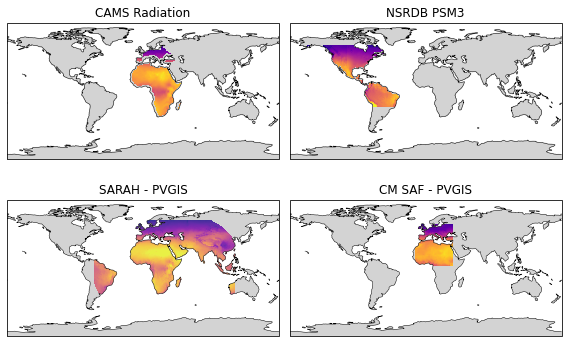

In [ ]:
kwh_to_w = 1000/8760
vmin, vmax = 800, 2500

crs = cartopy.crs.PlateCarree()

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(8, 8),
    sharex=True, sharey=True, subplot_kw={'projection': crs})

axes[0,0].set_title('CAMS Radiation')
cams_eu_extent = [cams_eu.bounds[0], cams_eu.bounds[2], cams_eu.bounds[1], cams_eu.bounds[3]]
cams_af_extent = [cams_af.bounds[0], cams_af.bounds[2], cams_af.bounds[1], cams_af.bounds[3]]
rasterio.plot.show(cams_eu_masked, extent=cams_eu_extent, ax=axes[0,0], cmap='plasma', zorder=2, vmin=vmin, vmax=vmax)
rasterio.plot.show(cams_af_masked, extent=cams_af_extent, ax=axes[0,0], cmap='plasma', zorder=2, vmin=vmin, vmax=vmax)

axes[0,1].set_title('NSRDB PSM3')
nsrdb_extent = [nsrdb.bounds[0], nsrdb.bounds[2], nsrdb.bounds[1], nsrdb.bounds[3]]
rasterio.plot.show(nsrdb, extent=nsrdb_extent, ax=axes[0,1], cmap='plasma', zorder=2, vmin=vmin/365, vmax=vmax/365)

axes[1,0].set_title('SARAH - PVGIS')
sarah_extent = [sarah.bounds[0], sarah.bounds[2], sarah.bounds[1], sarah.bounds[3]]
rasterio.plot.show(sarah, extent=sarah_extent, ax=axes[1,0], cmap='plasma', zorder=2, alpha=0.8, vmin=vmin*kwh_to_w, vmax=vmax*kwh_to_w)

axes[1,1].set_title('CM SAF - PVGIS')
cmsaf_extent = [cmsaf.bounds[0], cmsaf.bounds[2], cmsaf.bounds[1], cmsaf.bounds[3]]
ax = rasterio.plot.show(cmsaf, extent=cmsaf_extent, ax=axes[1,1], cmap='plasma', zorder=2, vmin=vmin*kwh_to_w, vmax=vmax*kwh_to_w)

for ii, ax in enumerate(axes.flatten()):
    ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', zorder=0)
    ax.coastlines(edgecolor='black', lw=0.5, zorder=3)
    ax.set_extent([-180, 180, -90, 90])
    if ii > 1:  # Only plot OCEAN layer for PVGIS
        ax.add_feature(cartopy.feature.OCEAN, lw=0, facecolor='w', zorder=2)

fig.tight_layout(h_pad=-12)
plt.show()

The different maps clearly illustrate the difference in geographical coverage of the four different data providers. Note that the full coverage of CAMS is not shown, as it also covers the Atlantics Ocean and parts of South America. The actual coverage of CM SAF is also larger, extending all the way to South Africa.

Nevertheless, the irradiance maps are interesting and can be further used to compare in which areas the estimated irradiance differs the most.